In [61]:
# 1. So this would be my proceedure to follow or what I am doing actually
# 2. I read in the data and get the right information abou the data
# 3. This data does not need much cleaning at least for the target and it is already seperated into test and train data so I proceed
# 4. I produce a model
# 5. I use the model against the test set 
# 6. I evaluate how well the model fits the actual data for the insurance

In [167]:
#importing the needed libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


In [24]:
#importing data from pc
test_auto = pd.read_table('/home/joshua/data-scientist-technical-test-main/data/auto-insurance-fall-2017/test_auto.csv',sep=',')
train_auto = pd.read_table('/home/joshua/data-scientist-technical-test-main/data/auto-insurance-fall-2017/train_auto.csv',sep=',')

In [130]:
train_auto.columns

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [54]:
#finding some more information about data

train_auto    
#test_auto
#train_auto.info() 
#train_auto.shape
#train_auto.head()
#train_auto.describe()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.000000,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.000000,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.000000,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.000000,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.000000,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.000000,0,34.0,1,12.0,"$125,301",Yes,$0,...,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
6,8,0,0.000000,0,54.0,0,NaN,"$18,755",No,NaN,...,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
7,11,1,4021.000000,1,37.0,2,NaN,"$107,961",No,"$333,680",...,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
8,12,1,2501.000000,0,34.0,0,10.0,"$62,978",No,$0,...,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
9,13,0,0.000000,0,50.0,0,7.0,"$106,952",No,$0,...,"$18,510",7,Van,no,$0,0,No,1,17.0,z_Highly Rural/ Rural


In [131]:
# Assign names
names =  ['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']

In [37]:
# Assign variables
#X = train_auto.data 
#y = train_auto.target


In [66]:
#seperating into variables(for data and target). The Target as TARGET_FLAG for train_auto as y and for Test_auto as v
X = train_auto.iloc[:, : -1].values 
y = train_auto.iloc[:, 0].values

u = test_auto.iloc[:, : -1].values
v = test_auto.iloc[:, 0].values

In [63]:
X

array([[1, 0, 0.0, ..., 'No', 3, 18.0],
       [2, 0, 0.0, ..., 'No', 0, 1.0],
       [4, 0, 0.0, ..., 'No', 3, 10.0],
       ...,
       [10299, 0, 0.0, ..., 'No', 0, 1.0],
       [10301, 0, 0.0, ..., 'No', 0, 11.0],
       [10302, 0, 0.0, ..., 'No', 0, 9.0]], dtype=object)

In [60]:
#dimensions of my data
print(train_auto.shape)
print(test_auto.shape)

(8161, 26)
(2141, 26)


In [129]:
from sklearn.model_selection import train_test_split
train_auto_train, train_auto_test, test_auto_train,test_auto_test = train_test_split(X,y,test_size = 0.)

In [106]:
train_auto_train

array([[6686, 0, 0.0, ..., 'No', 0, 12.0],
       [9306, 0, 0.0, ..., 'No', 0, 1.0],
       [1439, 0, 0.0, ..., 'No', 0, 5.0],
       ...,
       [2486, 0, 0.0, ..., 'No', 2, 12.0],
       [4007, 0, 0.0, ..., 'No', 0, 17.0],
       [2091, 0, 0.0, ..., 'No', 5, nan]], dtype=object)

In [148]:
# Creating a linear regression model and training it using the training set
reg = linear_model.LinearRegression()

train_auto_train = train_auto.drop('TARGET_FLAG',axis = 1)
train_auto_test  =  train_auto.iloc[:, 0] # or y 


In [138]:
print(train_auto_train.shape)
print(train_auto_test.shape)

(8161, 25)
(8161,)


In [161]:
#Printing regression coefficients
LinearRegression()
#reg.fit(train_auto_train,train_auto_test)
#print('Coefficient', reg.coef_)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [156]:
# Similar process for test data

test_auto_train = test_auto.loc[:,names]
    
test_auto_test  = test_auto[['TARGET_FLAG']].as_matrix

In [155]:
#prediction_of_test = reg.predict(test_auto_train)

In [177]:
sum = 0
rows =len(test_auto_test)
for i in range(rows):
    test = test_auto_test[i]
    prediction = prediction_of_test[i]
    difference = (test -prediction**2)
    sum = sum + difference
mse = sum / rows
print('MSE is ', mse)
    


TypeError: object of type 'method' has no len()

In [ ]:
# I wanted to plot the test and prediction and graph it to understand to show the best fit  
#between the actual and predicted data but I had an error with the linear regression

Text(0, 0.5, 'TARGET_FLAG')

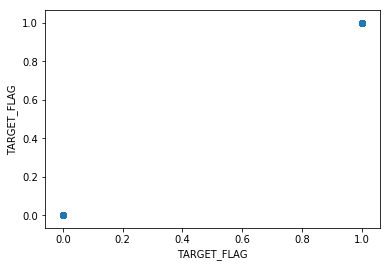

In [176]:
y = train_auto['TARGET_FLAG']

plot = plt.figure(1)
plt.scatter(train_auto['TARGET_FLAG'],y)
plt.xlabel('TARGET_FLAG')
plt.ylabel('TARGET_FLAG')
